In [1]:
# Sparkの起動
import os, sys
import pandas as pd
import numpy as np
from datetime import datetime as dt
print "loading PySpark setting..."
spark_home = os.environ.get('SPARK_HOME', None)
print spark_home
if not spark_home:
    raise ValueError('SPARK_HOME environment variable is not set')
sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.8.2.1-src.zip'))
execfile(os.path.join(spark_home, 'python/pyspark/shell.py'))

loading PySpark setting...
/usr/local/bin/spark-1.5.0-bin-hadoop2.6
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.5.0
      /_/

Using Python version 2.7.10 (default, May 28 2015 17:04:42)
SparkContext available as sc, HiveContext available as sqlContext.


In [3]:
# Exampleデータの読み込み
df = pd.read_csv(os.path.join(spark_home, 'data/mllib/als/sample_movielens_ratings.txt'),
                 delimiter='::', names=('uid', 'iid', 'rating','time'),engine='python')
pv_rating = df.pivot(index='uid', columns='iid', values='rating').fillna(0)

In [4]:
pv_rating

iid,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
uid,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,1,0,2,0,0,0,4,...,0,3,4,0,1,2,1,0,1,1
1,0,0,2,1,2,0,1,0,0,3,...,0,1,2,1,2,0,1,1,0,0
2,0,0,0,0,3,0,1,0,5,1,...,1,0,4,5,0,0,0,0,0,0
3,1,1,1,0,0,0,0,3,3,1,...,0,1,0,0,3,0,0,0,0,0
4,0,1,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,1,1,1,1
5,1,1,0,0,1,1,0,0,1,3,...,4,2,0,0,0,2,0,0,0,1
6,1,1,3,0,0,1,1,0,0,1,...,0,2,0,0,1,2,1,0,0,0
7,0,1,2,1,1,0,0,1,0,0,...,0,0,2,0,0,0,1,1,1,0
8,1,0,4,2,2,1,0,1,0,1,...,1,0,2,0,0,4,3,1,1,1


(30, 100)


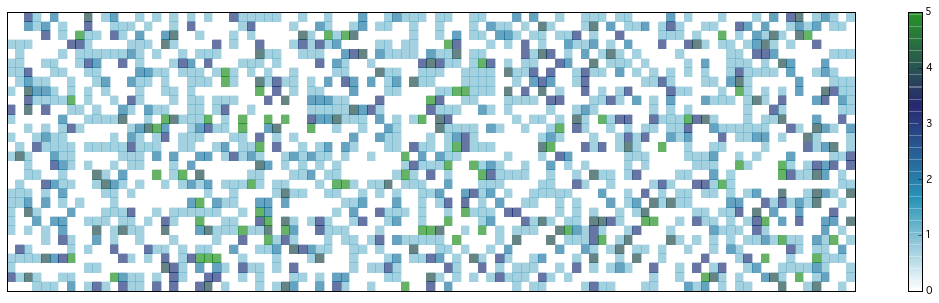

In [13]:
# Ratingの可視化
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n_y, n_x = pv_rating.shape
X, Y = np.meshgrid(range(n_x+1), range(n_y+1))
Z = pv_rating.as_matrix()
Z.astype(np.float32)
Z = Z[::-1,:]
print Z.shape
fig = plt.figure(figsize=(19,5))
ax = plt.subplot(111)
plt.ylim(0,30)
plt.xlim(0,99)
ax.set_xticks([])
ax.set_yticks([])
cax = ax.pcolor(X, Y, Z, cmap=cm.get_cmap('ocean_r'), alpha=0.6)

cbar = fig.colorbar(cax, ticks=range(6))
#cbar.ax.set_yticklabels(['5', '4', '3', '2', '1', '0'])# vertically oriented colorbar
plt.show()

In [44]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

def limitter(x):
    if x > 5:   # 5以上の値は5とする
        return 5
    elif x < 0: # マイナスの値は0とする
        return 0
    else:
        return x
    
# トレーニングデータの準備
sc_rating = sc.parallelize(df.as_matrix())
ratings = sc_rating.map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))

# ALS(Alternating Least Squares)でレコメンデーションの生成
rank = 10
numIterations = 10
model = ALS.train(ratings, rank, numIterations)


In [96]:
# 
n_y, n_x = pv_rating.shape
X, Y = np.meshgrid(range(n_x+1), range(n_y+1))
f_XY = np.c_[Y.flatten(), X.flatten()]
predictions_all = model.predictAll(sc.parallelize(f_XY)).map(lambda r: ((r[0], r[1]), limitter(r[2]) ))

def selector(x, y):
    if x is None:
        return y
    elif x != 0:
        return x
    else:
        return y

# すでにratingがあるところはキープして、無いところにALSで計算した値を代入
ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).rightOuterJoin(predictions_all).map(lambda r: ((r[0][0], r[0][1]), selector(r[1][0], r[1][1])) )
                                                                                      
result = np.array(ratesAndPreds.sortBy(lambda x: (x[0], x[1])).collect())
Z = result[:,1]
Z = Z.astype(np.float32).reshape(pv_rating.shape)[::-1,:]

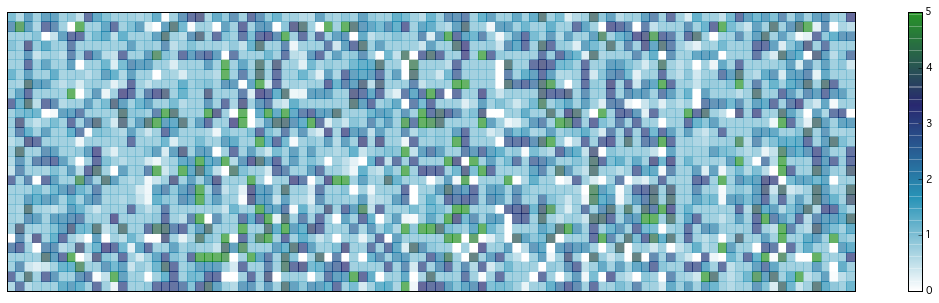

In [97]:
fig = plt.figure(figsize=(19,5))
ax = plt.subplot(111)
plt.ylim(0,29)
plt.xlim(0,99)
ax.set_xticks([])
ax.set_yticks([])

cax = ax.pcolor(X, Y, Z, cmap=cm.get_cmap('ocean_r'), alpha=0.6)
cbar = fig.colorbar(cax, ticks=range(6))

plt.show()

In [91]:
# 精度の計算
testdata = ratings.map(lambda p: (p[0], p[1]))

predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), limitter(r[2]) ))

ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)

MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error = " + str(MSE))



Mean Squared Error = 0.0558736464582


In [113]:
ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).rightOuterJoin(predictions_all).map(lambda r: ((r[0][0], r[0][1]), (r[1][0], r[1][1])) )
ratesAndPreds.collect()[10:30]

[((29, 17), (3.0, 2.9547048179008057)),
 ((23, 51), (None, 1.421916504776083)),
 ((11, 7), (None, 1.9669319580489901)),
 ((28, 10), (None, 0.06769150007295854)),
 ((9, 93), (None, 2.349846935916598)),
 ((23, 91), (None, 2.597452490149535)),
 ((17, 13), (2.0, 2.0700773308441507)),
 ((16, 38), (1.0, 0.8512992797830536)),
 ((22, 12), (None, 3.331810711043588)),
 ((12, 50), (4.0, 4.095528922729588)),
 ((11, 15), (None, 1.1874705514088135)),
 ((1, 21), (3.0, 2.1705020628379135)),
 ((22, 52), (None, 3.4707062021048283)),
 ((0, 14), (None, 0.503229802782621)),
 ((8, 94), (None, 1.0007500227764983)),
 ((29, 89), (None, 0.4272431835442813)),
 ((5, 1), (1.0, 1.2148556310982808)),
 ((4, 42), (None, 1.030942641195369)),
 ((25, 13), (None, 1.5033919417064503)),
 ((3, 55), (None, 2.50649511105159))]